In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile

local_zip = '/content/drive/My Drive/iQube/archive.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/drive/My Drive/iQube')

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

In [ ]:
import pandas as pd

# **Data Cleaning and Preprocessing**







In [ ]:
# Helper function to read train and test data

def file_reader(data, encoding='latin-1'):
    return pd.read_csv(data, encoding=encoding)

In [ ]:
train= file_reader('/content/drive/My Drive/iQube/Corona_NLP_train.csv')

test = file_reader('/content/drive/My Drive/iQube/Corona_NLP_test.csv')

In [ ]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
train.shape

(41157, 6)

In [ ]:
test.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive


In [ ]:
train.shape

(41157, 6)

In [ ]:
test.shape

(3798, 6)

# **EDA and Data Visulisation**

In [ ]:
train.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
train_tweet_count = train.Location.value_counts().reset_index().rename(
    columns={'index': 'Country', 'Location': "Count"}
)



In [ ]:
train_tweet_count

,Country,Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
...,...,...
12215,Living on Ramindjeri land,1
12216,Diepsloot,1
12217,Wherever I happen to be...,1
12218,England and Wales,1


In [ ]:
fig = go.Figure(go.Bar(
    x=train_tweet_count['Country'][:15],y=train_tweet_count
['Count'][:15],
    marker={'color': train_tweet_count['Count'][:15], 
    'colorscale': 'blues'},  
    text=train_tweet_count['Count'][:15],
    textposition = "outside",
))
fig.update_layout(title_text='Top Countries with most tweets',xaxis_title="Countries",
                  yaxis_title="Number of Tweets",template="plotly_dark",height=700,title_x=0.5)

fig.show()

# **Top Countries with most tweets**

In [ ]:
train['Country_Name']=train['Location'].str.split(',').str[-1]

In [ ]:
train.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country_Name,tweet_date,hash
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London,2020-03-16,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,UK,2020-03-16,


In [ ]:
train['tweet_date']=pd.to_datetime(train['TweetAt']).dt.date
tweet_date=train['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'])
tweet_date=tweet_date.sort_values('date',ascending=False)
# tweet_date=tweet_date.sort_values('count',ascending=False)
tweet_date.head(5)

,date,count
20,2020-12-04,803
18,2020-11-04,909
16,2020-10-04,1005
12,2020-09-04,1471
8,2020-08-04,1881


# **Tweets per Day**

In [ ]:
fig=go.Figure(go.Scatter(x=tweet_date['date'],
                                y=tweet_date['count'],
                               mode='markers+lines',
                               name="Submissions",
                               marker_color='dodgerblue'))

fig.update_layout(
    title_text='Tweets per Day : ({} - {})'.format(tweet_date['date'].sort_values()[0].strftime("%d/%m/%Y"),
                                                       tweet_date['date'].sort_values().iloc[-1].strftime("%d/%m/%Y")),template="plotly_dark",
    title_x=0.5)

fig.show()

In [ ]:
train.head()

In [ ]:
import re
from collections import Counter

def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)
train['hash']=train['OriginalTweet'].apply(lambda x:find_hash(x))


In [ ]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country_Name,tweet_date,hash
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London,2020-03-16,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,UK,2020-03-16,
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds,2020-03-16,
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,NaN,2020-03-16,COVID19france COVID_19 COVID19 coronavirus con...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,NaN,2020-03-16,COVID19 coronavirus CoronavirusFrance restezch...


In [ ]:


hastags= list(train[(train['hash'].notnull())&(train['hash']!="")]['hash'])
hastags = [each_string.lower() for each_string in hastags]
hash_df=dict(Counter(hastags))
top_hashtags_df=pd.DataFrame(list(hash_df.items()),columns = ['hashtags','count']).sort_values('count',ascending=False)[:20]
top_hashtags_df.head(4)

,hashtags,count
7,coronavirus,3354
2,covid_19,723
17,covid2019,420
8,coronavirus covid19,349


In [ ]:
fig = go.Figure(go.Bar(
    x=top_hashtags_df['hashtags'],y=top_hashtags_df['count'],
    marker={'color': top_hashtags_df['count'], 
    'colorscale': 'blues'},  
    text=top_hashtags_df['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top Trended Hastags',xaxis_title="Hashtags",
                  yaxis_title="Number of Tags",template="plotly_dark",height=600,title_x=0.5)
fig.show()

# **Top Trended Hastags**

In [ ]:
train.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country_Name,tweet_date,hash
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London,2020-03-16,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,UK,2020-03-16,


In [ ]:
def find_at(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
train['mentions']=train['OriginalTweet'].apply(lambda x:find_at(x))

In [ ]:
import itertools
mentions=list(train[(train['mentions'].notnull())&(train['mentions']!="")]['mentions'])
mentions = [each_string.lower().split() for each_string in mentions]
mentions=list(itertools.chain.from_iterable(mentions))
mention_df=dict(Counter(mentions))
top_mention_df=pd.DataFrame(list(mention_df.items()),columns = ['word','count']).sort_values('count',ascending=False)[:20]
top_mention_df.head(10)

,word,count
48,realdonaldtrump,254
94,tesco,199
96,sainsburys,161
24,borisjohnson,151
106,amazon,128
156,narendramodi,112
93,asda,109
155,pmoindia,96
95,morrisons,92
356,piersmorgan,85


# **Top Trended Mentions**

In [ ]:
fig = go.Figure(go.Bar(
    x=top_mention_df['word'],y=top_mention_df['count'],
    marker={'color': top_mention_df['count'], 
    'colorscale': 'blues'},  
    text=top_mention_df['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top Trended Mentions',xaxis_title="Mentions",
                  yaxis_title="Number of Tags",template="plotly_dark",height=700,title_x=0.5)
fig.show()

**Average Length of Word in Tweet**

In [ ]:
def remove_tag(string):
    text=re.sub('<.*?>','',string)
    return text
def remove_mention(text):
    line=re.sub(r'@\w+','',text)
    return line
def remove_hash(text):
    line=re.sub(r'#\w+','',text)
    return line

def remove_newline(string):
    text=re.sub('\n','',string)
    return text
def remove_url(string): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',string)
    return text
def remove_number(text):
    line=re.sub(r'[0-9]+','',text)
    return line
def remove_punct(text):
    line = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',text)
    #string="".join(line)
    return line
def text_strip(string):
    line=re.sub('\s{2,}', ' ', string.strip())
    return line
def remove_thi_amp_ha_words(string):
    line=re.sub(r'\bamp\b|\bthi\b|\bha\b',' ',string)
    return line

In [ ]:
train['refine_text']=train['OriginalTweet'].str.lower()
train['refine_text']=train['refine_text'].apply(lambda x:remove_tag(str(x)))
train['refine_text']=train['refine_text'].apply(lambda x:remove_mention(str(x)))
train['refine_text']=train['refine_text'].apply(lambda x:remove_hash(str(x)))
train['refine_text']=train['refine_text'].apply(lambda x:remove_newline(x))
train['refine_text']=train['refine_text'].apply(lambda x:remove_url(x))
train['refine_text']=train['refine_text'].apply(lambda x:remove_number(x))
train['refine_text']=train['refine_text'].apply(lambda x:remove_punct(x))
train['refine_text']=train['refine_text'].apply(lambda x:remove_thi_amp_ha_words(x))
train['refine_text']=train['refine_text'].apply(lambda x:text_strip(x))

train['text_length']=train['refine_text'].str.split().map(lambda x: len(x))

In [ ]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country_Name,tweet_date,hash,mentions,refine_text,text_length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London,2020-03-16,,MeNyrbie Phil_Gahan Chrisitv,and and,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,UK,2020-03-16,,,advice talk to your neighbours family to excha...,38
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds,2020-03-16,,,coronavirus australia woolworths to give elder...,13
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,NaN,2020-03-16,COVID19france COVID_19 COVID19 coronavirus con...,,my food stock is not the only one which is emp...,34
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,NaN,2020-03-16,COVID19 coronavirus CoronavirusFrance restezch...,,me ready to go at supermarket during the outbr...,33


# **Distribution of Text length**

In [ ]:
fig = go.Figure(data=go.Violin(y=train['text_length'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='royalblue', opacity=0.6,
                               x0='Tweet Text Length'))

fig.update_layout(yaxis_zeroline=False,title="Distribution of Text length",template='presentation')
fig.show()

# **Most used word in Tweets**

Text(0.5, 1.0, 'Most Used Words in Tweets')

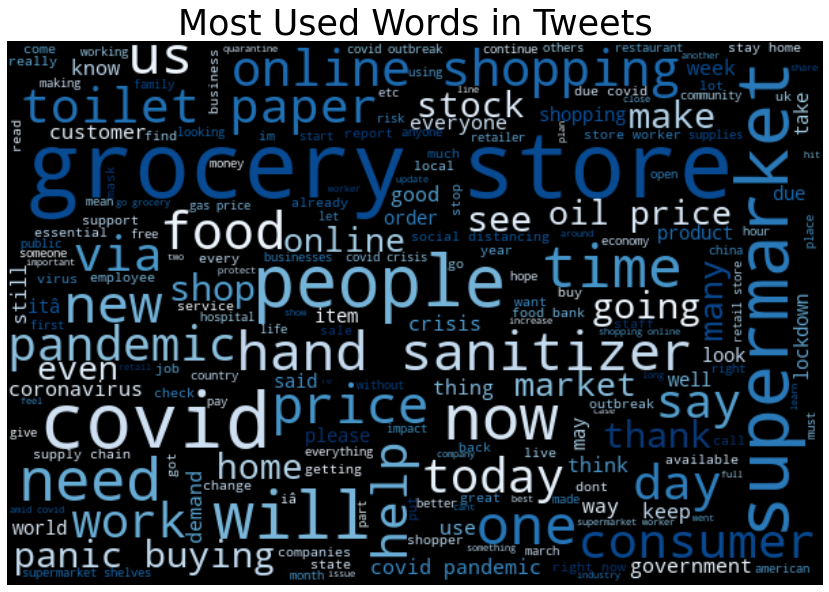

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


fig, (ax2) = plt.subplots(1,1,figsize=[17, 10])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(train['refine_text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words in Tweets',fontsize=35)

# **Unigram, Bigram and Trigram**





In [ ]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from PIL import Image
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
unigram_df=ngram_df(train['refine_text'],(1,1),20)
bigram_df=ngram_df(train['refine_text'],(2,2),20)
trigram_df=ngram_df(train['refine_text'],(3,3),20)

In [ ]:
fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])

fig.add_trace(go.Bar(
    y=unigram_df['text'][::-1],
    x=unigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=unigram_df['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
),row=1,col=1)

fig.add_trace(go.Bar(
    y=bigram_df['text'][::-1],
    x=bigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=bigram_df['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['text'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
                  showlegend=False,title_x=0.5,height=1500,template="plotly_dark")
fig.show()


- **covid,prices and store are most used single word.**
- **grocery store,hand sanitizer and online shopping are most used bigrams.**
-**grocery store workers,grocery store employees,going grocery store are most used trigrams**

## **Class Label Distribution**

**Note: I will convert class label into 3 classes ==> Positive, Negative and Neural**

In [ ]:
train.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country_Name,tweet_date,hash,mentions,refine_text,text_length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London,2020-03-16,,MeNyrbie Phil_Gahan Chrisitv,and and,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,UK,2020-03-16,,,advice talk to your neighbours family to excha...,38


In [ ]:
# using list comprehension to create a new column Tweet_sentiment
# 5 label have been reduced to 3 ==> positive, negative and neutral 

train['Tweet_sentiment'] = ["positive" if (i == "Extremely Positive") else "negative" if (i == "Extremely Negative") else "negative" if (i == "Negative") else
                            "positive" if (i =="Positive") else "neutral" for i in list(train['Sentiment'].values.astype(str))]




In [ ]:
train['Sentiment'].values.astype(str)

array(['Neutral', 'Positive', 'Positive', ..., 'Positive', 'Neutral',
       'Negative'], dtype='<U18')

In [ ]:
train.head(4)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country_Name,tweet_date,hash,mentions,refine_text,text_length,Tweet_sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London,2020-03-16,,MeNyrbie Phil_Gahan Chrisitv,and and,2,neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,UK,2020-03-16,,,advice talk to your neighbours family to excha...,38,positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds,2020-03-16,,,coronavirus australia woolworths to give elder...,13,positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,NaN,2020-03-16,COVID19france COVID_19 COVID19 coronavirus con...,,my food stock is not the only one which is emp...,34,positive


In [ ]:
train['Tweet_sentiment'].value_counts()

positive    18046
negative    15398
neutral      7713
Name: Tweet_sentiment, dtype: int64

In [ ]:
train_tweet_sentiment = train.Tweet_sentiment.value_counts().reset_index().rename(
    columns={'index': 'sentiment', 'Tweet_sentiment': "Count"}
)

In [ ]:
train_tweet_sentiment

,sentiment,Count
0,positive,18046
1,negative,15398
2,neutral,7713


In [ ]:
train_tweet_sentiment.describe()

,Count
count,3.000000
mean,13719.000000
std,5367.215572
min,7713.000000
25%,11555.500000
50%,15398.000000
75%,16722.000000
max,18046.000000


# **Tweet Sentiment Count**

In [ ]:
fig = go.Figure(go.Bar(
    x=train_tweet_sentiment['sentiment'],y=train_tweet_sentiment
['Count'],
    marker={'color': train_tweet_sentiment['Count'], 
    'colorscale': 'blues'},  
    text=train_tweet_sentiment['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Tweet Sentiment Count',xaxis_title="Sentiment",
                  yaxis_title="Sentiment Count",template="plotly_dark",height=700,title_x=0.5)

fig.show()

# **Modelling**
Logistic Regression



In [ ]:
train.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country_Name,tweet_date,hash,mentions,refine_text,text_length,Tweet_sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London,2020-03-16,,MeNyrbie Phil_Gahan Chrisitv,and and,2,neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,UK,2020-03-16,,,advice talk to your neighbours family to excha...,38,positive


In [ ]:
test.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive


In [ ]:
test['Sentiment'].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [ ]:
test['Tweet_sentiment'] = ["positive" if (i == "Extremely Positive") else "negative" if (i == "Extremely Negative") else "negative" if (i == "Negative") else
                            "positive" if (i =="Positive") else "neutral" for i in list(test['Sentiment'].values.astype(str))]

In [ ]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet_sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,neutral


# I am going to cleanup the test data 

In [ ]:



test['refine_text']=test['OriginalTweet'].str.lower()
test['refine_text']=test['refine_text'].apply(lambda x:remove_tag(str(x)))
test['refine_text']=test['refine_text'].apply(lambda x:remove_mention(str(x)))
test['refine_text']=test['refine_text'].apply(lambda x:remove_hash(str(x)))
test['refine_text']=test['refine_text'].apply(lambda x:remove_newline(x))
test['refine_text']=test['refine_text'].apply(lambda x:remove_url(x))
test['refine_text']=test['refine_text'].apply(lambda x:remove_number(x))
test['refine_text']=test['refine_text'].apply(lambda x:remove_punct(x))
test['refine_text']=test['refine_text'].apply(lambda x:remove_thi_amp_ha_words(x))
test['refine_text']=test['refine_text'].apply(lambda x:text_strip(x))



In [ ]:
test.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet_sentiment,refine_text
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,negative,trending new yorkers encounter empty supermark...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,positive,when i couldnt find hand sanitizer at fred mey...


In [ ]:
# for the purpose of modelling I will be dropping all other columns except Tweet_sentiment for both test and train data

train_log = train[['refine_text', 'Tweet_sentiment']]

test_log = test[['refine_text', 'Tweet_sentiment']]



In [ ]:
test_log = test_log.rename(index = str, columns = {'Tweet_sentiment': 'labels', 'refine_text': 'text'})

train_log = train_log.rename(index = str, columns = {'Tweet_sentiment': 'labels', 'refine_text': 'text'})


In [ ]:
train_log.head()

,text,labels
0,and and,neutral
1,advice talk to your neighbours family to excha...,positive
2,coronavirus australia woolworths to give elder...,positive
3,my food stock is not the only one which is emp...,positive
4,me ready to go at supermarket during the outbr...,negative


In [ ]:
test_log.head()

,text,labels
0,trending new yorkers encounter empty supermark...,negative
1,when i couldnt find hand sanitizer at fred mey...,positive
2,find out how you can protect yourself and love...,positive
3,buying hits city as anxious shoppers stock up ...,negative
4,one week everyone buying baby milk powder the ...,neutral


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# used list comprehension to encode the label

test_log['labels'] = [1 if (i == "positive") else 2 if (i == "negative") else 0 for i in list(test_log['labels'].values.astype(str))]

In [ ]:
test_log.head()

,text,labels
0,trending new yorkers encounter empty supermark...,2
1,when i couldnt find hand sanitizer at fred mey...,1
2,find out how you can protect yourself and love...,1
3,buying hits city as anxious shoppers stock up ...,2
4,one week everyone buying baby milk powder the ...,0


In [ ]:
train_log.head()

,text,labels
0,and and,neutral
1,advice talk to your neighbours family to excha...,positive
2,coronavirus australia woolworths to give elder...,positive
3,my food stock is not the only one which is emp...,positive
4,me ready to go at supermarket during the outbr...,negative


In [ ]:
train_log['labels'] = [1 if (i == "positive") else 2 if (i == "negative") else 0 for i in list(train_log['labels'].values.astype(str))]

In [ ]:
train_log.head()

,text,labels
0,and and,0
1,advice talk to your neighbours family to excha...,1
2,coronavirus australia woolworths to give elder...,1
3,my food stock is not the only one which is emp...,1
4,me ready to go at supermarket during the outbr...,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
X = train_log['text']
y= train_log['labels']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 299)

# TF-IDF 
**Tf-Idf stands for term frequency-inverse document frequency, and instead of calculating the counts of each word in each document of the dataset (Bow), it calculates the normalized count where each word count is divided by the number of documents this word appear**

TF-IDF Vectoriser converts a collection of raw documents to a matrix of TF-IDF features. The Vectoriser is usually trained on only the X_train dataset.

ngram_range is the range of number of words in a sequence. [e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2)]

max_features specifies the number of features to consider. [Ordered by feature frequency across the corpus].

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))


Vectoriser fitted.
No. of feature_words:  348169


# Tranforming the dataset
Transforming the **X_train** and **X_test** dataset into matrix of TF-IDF Features by using the TF-IDF Vectoriser. This datasets will be used to train the model and test against it.

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

# Creating and Evaluating Models: Logistic Regression

**Evaluate Model Function**

In [ ]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix\n')
    print(confusion)


# **Logistic Regression Performance**

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

              precision    recall  f1-score   support

           0       0.79      0.48      0.60      1575
           1       0.76      0.87      0.81      3558
           2       0.78      0.81      0.79      3099

    accuracy                           0.77      8232
   macro avg       0.78      0.72      0.73      8232
weighted avg       0.77      0.77      0.76      8232

Confusion Matrix

[[ 757  491  327]
 [  99 3080  379]
 [ 106  488 2505]]


In [ ]:
y_pred = LRmodel.predict(X_test)
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))



Accuracy: 0.77

Micro Precision: 0.77
Micro Recall: 0.77
Micro F1-score: 0.77

Macro Precision: 0.78
Macro Recall: 0.72
Macro F1-score: 0.73

Weighted Precision: 0.77
Weighted Recall: 0.77
Weighted F1-score: 0.76
